In [284]:
import numpy as np 
import matplotlib.pyplot as plt
import skimage
from scipy.ndimage import convolve

### Exercise Overview
We will experimentally test the statements made in the text above. You may use an existing implementation of convolution, e.g., `scipy.ndimage.convolve`. However, refrain from using an existing implementation of the Gaussian filtering or functions returning the Gaussian kernel and its derivative.

### Data
For this exercise, you may use any grayscale image. We have provided an X-ray CT image of fibers, `fibres_xcth.png`, shown in **Figure 1.1** and **Figure 1.2**.


<img src="data/fibres_xcth.png" alt="Fibres Image" width="20%">



### Tasks

1. **Create Gaussian Kernel**  
   Gaussian kernels are usually truncated at a value between 3 and 5 times $\sigma$. You can create a kernel as follows:

   (a) Compute an integer kernel radius $s$ approximately equal to $4\sigma$.

   (b) Create an array $x$ with integer values centered around 0, that is  
   $x = [-r, \ldots, 0, \ldots, r]$.

   (c) Compute the kernel values using equation 1.4. You may initially compute the values without the normalization term and normalize the kernel to ensure the sum of all values equals 1.

   Verify that your kernel is correct by plotting $x$ against $g$ as shown in **Figure 1.4**. A kernel with the derivative of the Gaussian can be created similarly, and you can see the plot in **Figure 1.5**.





In [314]:
def create_1D_kernel(sigma, x):
    kernel = np.exp(-x**2 / (2 * sigma**2))
    kernel /= kernel.sum()
    return kernel


def derivative_1D_kernel(sigma, x):
    kernel = -x/(sigma**2) * np.exp(-0.5 * (x/sigma)**2)
    return kernel



Len x: 37


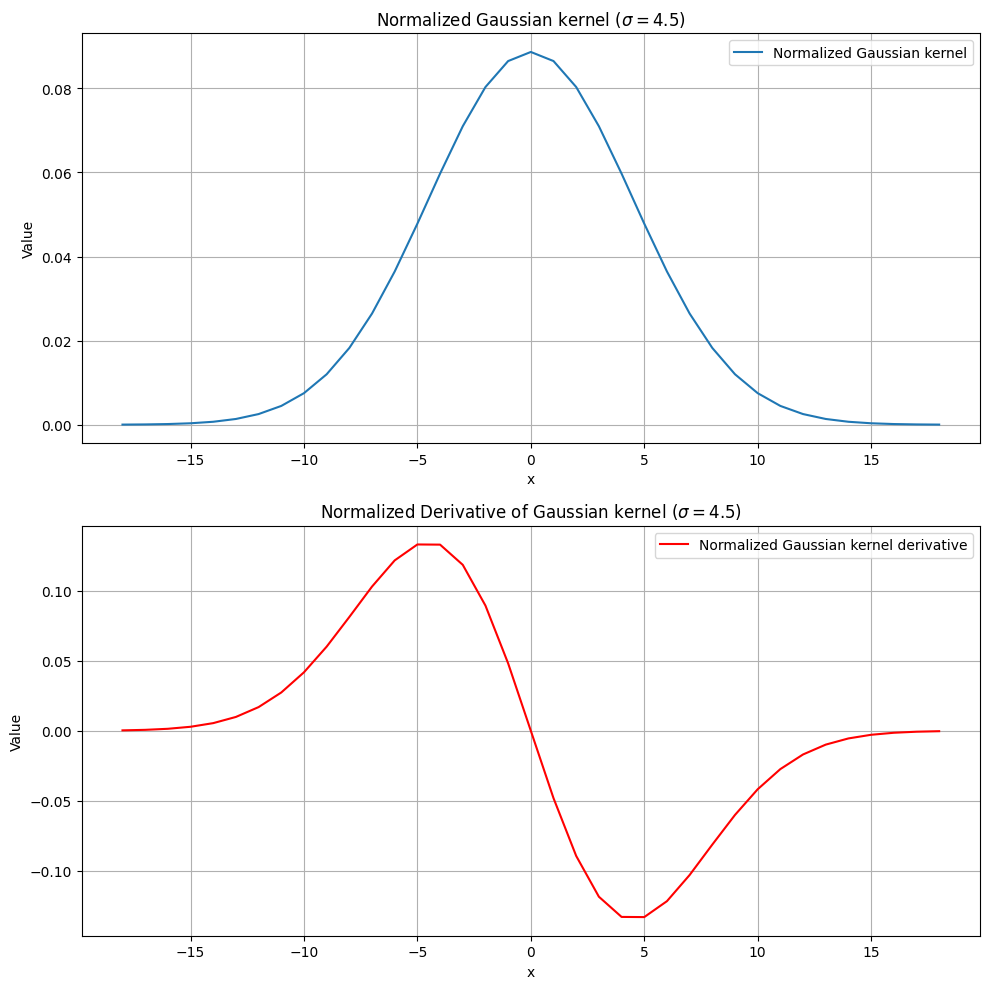

In [315]:
# standard deviation of the Gaussian kernel
SIGMA  = 4.5
N = 4
RADIUS = int(N * SIGMA)

x = np.arange(-RADIUS, RADIUS + 1)

print(f"Len x: {len(x)}")


# create the 1D kernel
kernel_1D = create_1D_kernel(SIGMA , x)
assert np.allclose(kernel_1D.sum(), 1), "Kernel is not normalized"

# create the 1D derivative kernel
kernel_1D_grad = derivative_1D_kernel(SIGMA , x)

# Plot the kernels
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot normalized Gaussian kernel
ax[0].plot(x, kernel_1D, label="Normalized Gaussian kernel")
ax[0].set_title(rf"Normalized Gaussian kernel ($\sigma = {SIGMA}$)")
ax[0].set_xlabel("x")
ax[0].set_ylabel("Value")
ax[0].grid()
ax[0].legend()

# Plot normalized derivative of Gaussian kernel
ax[1].plot(x, kernel_1D_grad, label="Normalized Gaussian kernel derivative", color="red")
ax[1].set_title(rf"Normalized Derivative of Gaussian kernel ($\sigma = {SIGMA}$)")
ax[1].set_xlabel("x")
ax[1].set_ylabel("Value")
ax[1].grid()
ax[1].legend()

plt.tight_layout()
plt.show()

2. **Experimentally Verify the Separability of the Gaussian Kernel**  
   For this, convolve the test image with a 2D Gaussian kernel. Note that you can get a 2D Gaussian kernel as the *outer product* of two 1D kernels. Then, convolve the same test image with two orthogonal 1D kernels. You should get the same result, i.e., after subtracting the two images, the image difference should be small.  

   **Tip**: Use the `'bwr'` colormap to visualize the difference image. Look at the sketch in **Figure 1.6** to understand what you are testing.


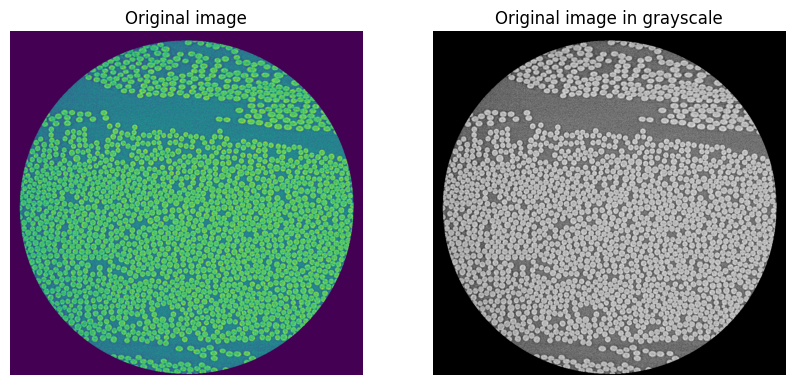

In [316]:
# import image with skimage 
image_origo = skimage.io.imread("data/fibres_xcth.png")
# convert image to grayscale and to float 
#image = skimage.color.rgb2gray(image_origo)

if image_origo.ndim == 3:
    image = skimage.color.rgb2gray(image_origo)
image = skimage.img_as_float(image)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image_origo)
ax[0].set_title("Original image")
ax[0].axis('off')
ax[1].imshow(image, cmap='gray')
ax[1].set_title("Original image in grayscale")
ax[1].axis('off')
plt.show()

Shape of the 2D kernel: (37, 37)


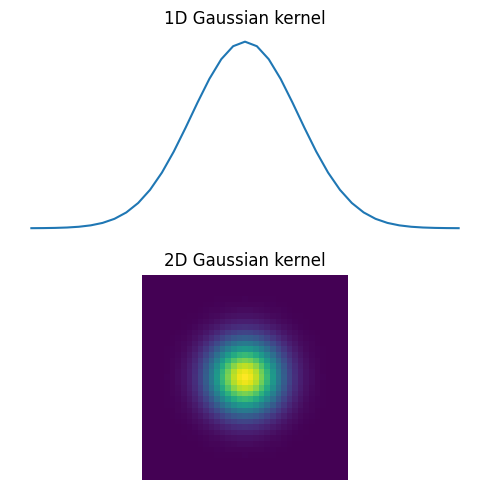

In [317]:
# create 2D kernel by outer product of the 1D kernels
kernel_2d = np.outer(kernel_1D, kernel_1D)
print(f"Shape of the 2D kernel: {kernel_2d.shape}")

# visualize the kernel 
fig, ax = plt.subplots(2, 1, figsize=(5, 5))
ax[0].plot(kernel_1D)
ax[0].set_title("1D Gaussian kernel")
ax[0].axis('off')
ax[1].imshow(kernel_2d, cmap='viridis')
ax[1].set_title("2D Gaussian kernel")
ax[1].axis('off')
plt.tight_layout()
plt.show()

Shape of the original image: (988, 1013)
Shape of the blurred image: (988, 1013)


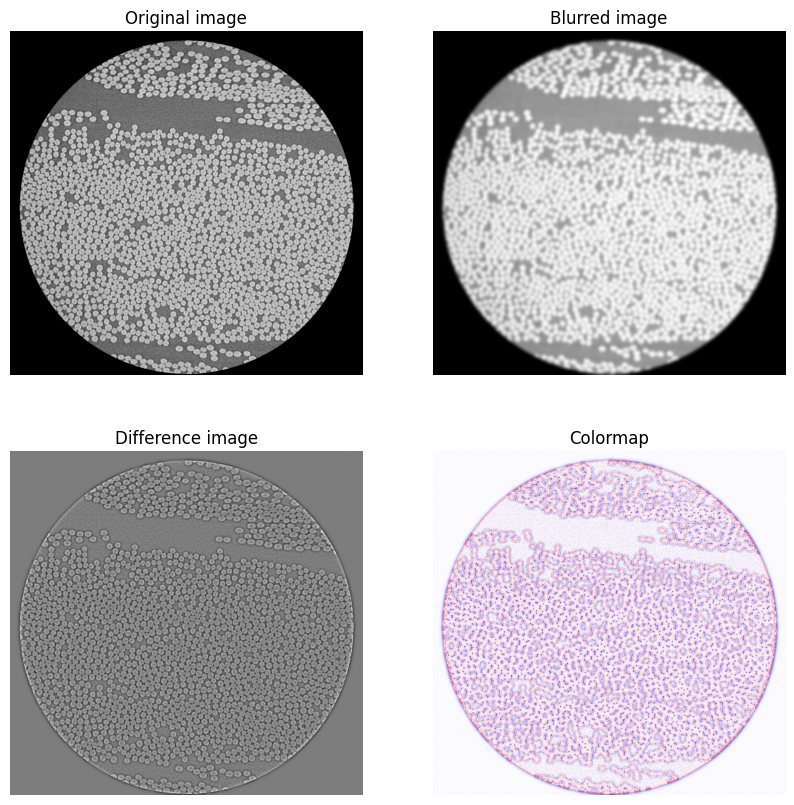

In [318]:
# applying the 2D gaussian kernel to the image
image_blurred = convolve(image, kernel_2d)
print(f"Shape of the original image: {image.shape}")
print(f"Shape of the blurred image: {image_blurred.shape}")

difference_image = image - image_blurred

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0][0].imshow(image, cmap='gray')
ax[0][0].set_title("Original image")
ax[0][0].axis('off')
ax[0][1].imshow(image_blurred, cmap='gray')
ax[0][1].set_title("Blurred image")
ax[0][1].axis('off')
ax[1][0].imshow(difference_image, cmap='gray')
ax[1][0].set_title("Difference image")
ax[1][0].axis('off')
ax[1][1].imshow(difference_image, cmap='bwr')
ax[1][1].set_title("Colormap")
ax[1][1].axis('off')
#plt.savefig("output/2d_gaussian_blur.png", dpi=300, bbox_inches='tight')
plt.show()


Shape of the column-wise kernel: (37, 1)
Shape of the image after column-wise convolution: (988, 1013)
Shape of the row-wise kernel: (1, 37)
Shape of the image after row-wise convolution: (988, 1013)


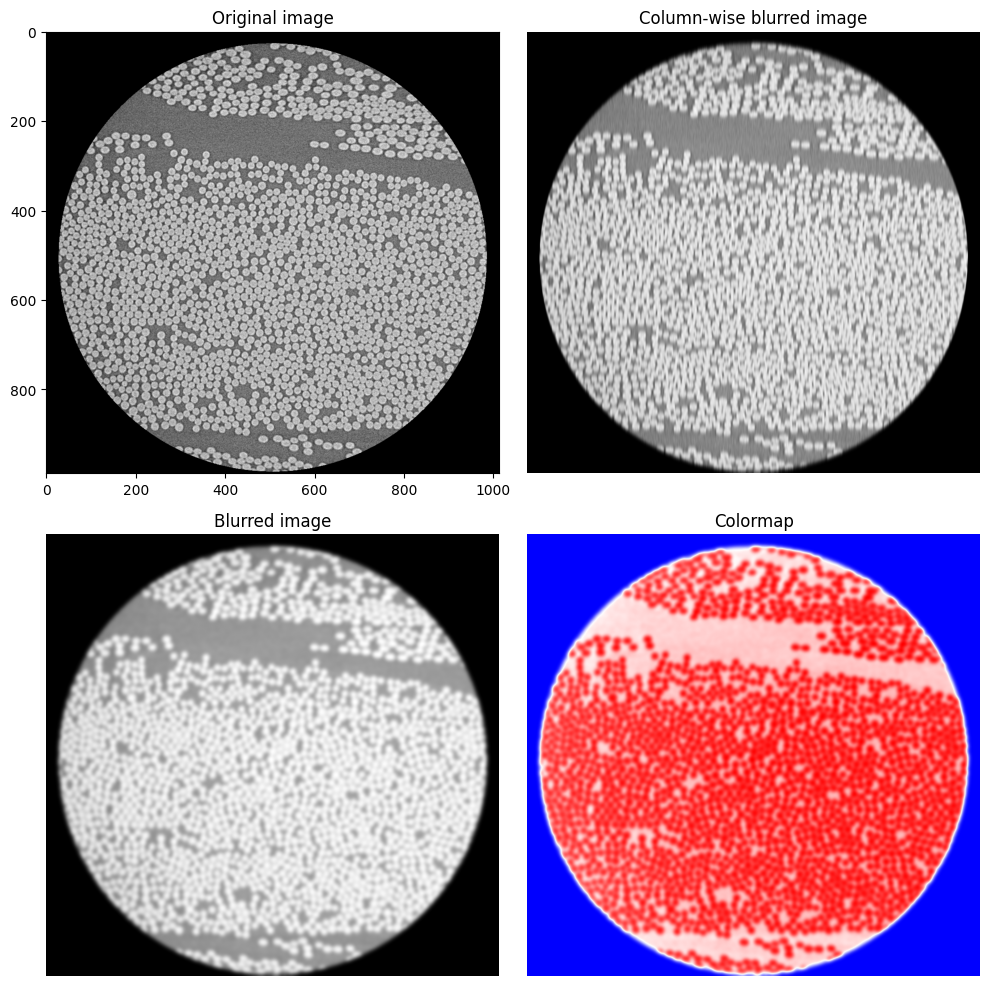

In [319]:
# first convolve the rows 

# convolve column wise
column_wise_gaussian_kernel = kernel_1D.reshape(-1, 1)
print(f"Shape of the column-wise kernel: {column_wise_gaussian_kernel.shape}")
image_columns = convolve(image, column_wise_gaussian_kernel)
print(f"Shape of the image after column-wise convolution: {image_columns.shape}")


# then convolve along the rows 
row_wise_gaussian_kernel = kernel_1D.reshape(1, -1)
print(f"Shape of the row-wise kernel: {row_wise_gaussian_kernel.shape}")
image_rows = convolve(image_columns, row_wise_gaussian_kernel)
print(f"Shape of the image after row-wise convolution: {image_rows.shape}")

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0][0].imshow(image, cmap='gray')
ax[0][0].set_title("Original image")
ax[0][1].axis('off')
ax[0][1].imshow(image_columns, cmap='gray')
ax[0][1].set_title("Column-wise blurred image")
ax[0][1].axis('off')
ax[1][0].imshow(image_rows, cmap='gray')
ax[1][0].set_title("Blurred image")
ax[1][0].axis('off')
ax[1][1].imshow(image_rows, cmap='bwr')
ax[1][1].set_title("Colormap")
ax[1][1].axis('off')
plt.tight_layout()
plt.show()

3. **Experimentally Verify 1.7**  
   It is enough to test the 1D case. That is, obtain one result by convolving the image with a 1D Gaussian, and take the derivative in the same direction. You can compute the derivative by convolving the image with the kernel $[0.5, 0, -0.5]$.  

   Obtain the second result by convolving the image with the derivative of the Gaussian. Verify that the difference between the two results is small.  

   **Hint**: Compute the average absolute difference between the two images.


##### Convonving the Image with a 1D Gaussian Kernel and then with the Derivative of the Gaussian Kernel

In [320]:
# define the kernel as a column vector
gaussian_kernel_column = kernel_1D.reshape(-1, 1)
print(f"Shape of the column-wise kernel: {gaussian_kernel_column.shape}")

Shape of the column-wise kernel: (37, 1)


Shape of the image after column-wise convolution: (988, 1013)


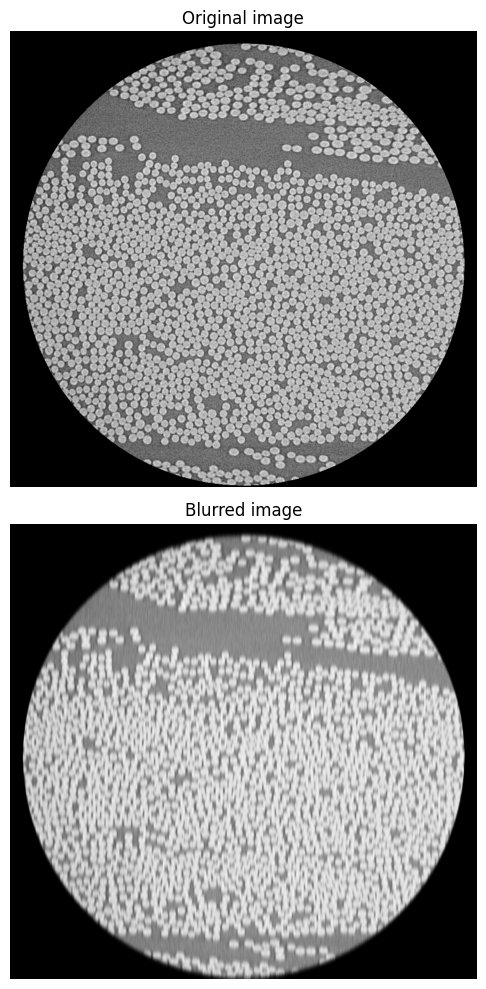

In [321]:
# convolve the image with the kernel
image_blurred = convolve(image, gaussian_kernel_column)
print(f"Shape of the image after column-wise convolution: {image_blurred.shape}")

# visualize the image
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")
ax[0].axis('off')
ax[1].imshow(image_blurred, cmap='gray')
ax[1].set_title("Blurred image")
ax[1].axis('off')
plt.tight_layout()
plt.show()

Shape of the derivative kernel: (3, 1)


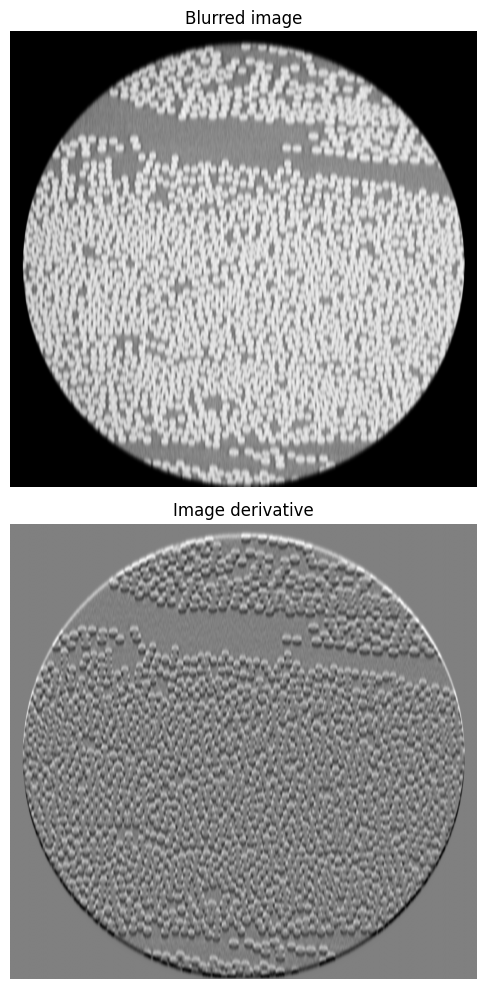

In [322]:
# derivative of the blurred image 
derivative_kernel = np.array([0.5, 0, -0.5]).reshape(-1, 1)
print(f"Shape of the derivative kernel: {derivative_kernel.shape}")


image_derivative = convolve(image_blurred, derivative_kernel)

# visualize the image derivative (single image)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].imshow(image_blurred, cmap='gray')
ax[0].set_title("Blurred image")
ax[0].axis('off')
ax[1].imshow(image_derivative, cmap='gray')
ax[1].set_title("Image derivative")
ax[1].axis('off')
plt.tight_layout()
plt.show()


##### Convonving the Image with a derivative of the Gaussian Kernel

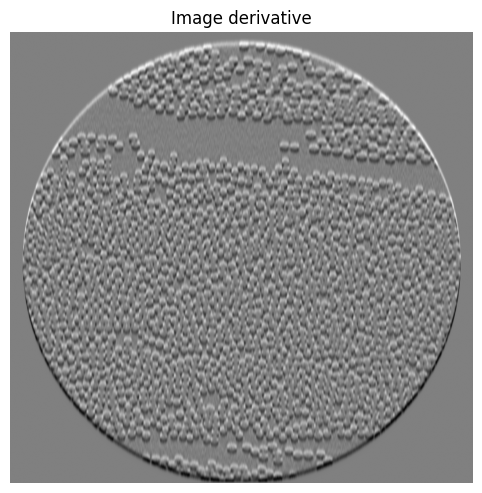

In [323]:
# convolve the image with the derivative kernel
image_derivative_gaussian = convolve(image, kernel_1D_grad.reshape(-1, 1))
# visualize the image derivative (single image)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(image_derivative_gaussian, cmap='gray')
ax.set_title("Image derivative")
ax.axis('off')
plt.tight_layout()
plt.show()


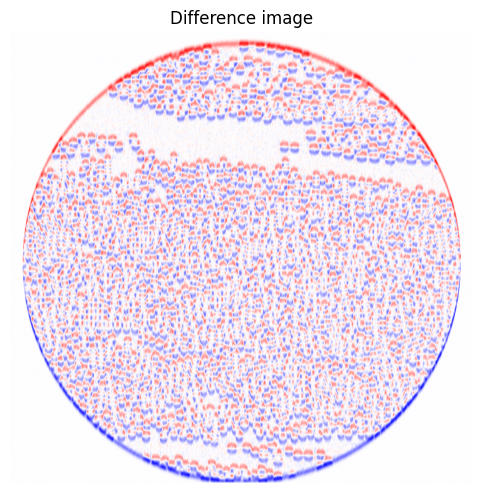

Average absolute difference between the two images: 0.5000


In [326]:
# calculate the difference between the two iamges 

difference_image = image_derivative_gaussian - image_derivative

# visualize the difference image
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(difference_image, cmap='bwr')
ax.set_title("Difference image")
ax.axis('off')
plt.tight_layout()
plt.show()


average_absolute_difference = np.mean(np.abs(image_derivative_gaussian - image_derivative))
print(f"Average absolute difference between the two images: {average_absolute_difference:.4f}")